___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# To display maximum columns and rows
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df_origin = pd.read_csv('clean_scout.csv')
df =  pd.read_csv('clean_scout.csv')

In [3]:
import re
def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

# PART- 2 `( Handling With Missing Vales )`

# Understanding The Variables

In [4]:
df.head()

,make_model,short_description,body_type,price,vat,km,registration,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_inspect,inspect_new,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb,cons_city,cons_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,01/2016,Used,2.0,06/202199 g CO2/km (comb),YesEuro 6,4 (Green),NaN,NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,3.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,66.0,06/2021,Yes,NaN,Cloth,Black,1422.0,1220.0,3.8,3.8,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,03/2017,Used,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Red,NaN,3.0,4.0,Automatic,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,141.0,NaN,NaN,NaN,Cloth,Grey,1798.0,1255.0,5.6,5.6,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,02/2016,Used,1.0,NaN,NaN,99 g CO2/km (comb),NaN,NaN,2016.0,Black,Metallic,4.0,4.0,Automatic,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,85.0,NaN,NaN,NaN,Cloth,Black,1598.0,NaN,3.8,3.8,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.0,08/2016,Used,1.0,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,2016.0,Brown,Metallic,3.0,4.0,Automatic,3.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,66.0,NaN,NaN,NaN,NaN,NaN,1422.0,1195.0,3.8,3.8,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.0,05/2016,Used,1.0,NaN,Yes109 g CO2/km (comb),Euro 6,4 (Green),NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,3.0,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,66.0,NaN,Yes,NaN,Cloth,Black,1422.0,NaN,4.1,4.1,3.8


In [5]:
df.shape

(15053, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15053 non-null  object 
 1   short_description    15007 non-null  object 
 2   body_type            15003 non-null  object 
 3   price                15053 non-null  int64  
 4   vat                  10956 non-null  object 
 5   km                   14084 non-null  float64
 6   registration         15053 non-null  object 
 7   type                 15051 non-null  object 
 8   previous_owners      8834 non-null   float64
 9   next_inspection      3436 non-null   object 
 10  inspection_new       3811 non-null   object 
 11  warranty             8739 non-null   object 
 12  full_service         5860 non-null   object 
 13  non_smoking_vehicle  3034 non-null   object 
 14  first_registration   13558 non-null  float64
 15  body_color           14509 non-null 

In [7]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'first_registration', 'body_color', 'paint_type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'next_inspect', 'inspect_new', 'warranty_month', 'upholstery_type',
       'upholstery_color', 'displacement_cc', 'weight_kg', 'cons_comb',
       'cons_city', 'cons_country'],
      dtype='object')

In [8]:
df.isnull().sum().sort_values()

make_model                 0
price                      0
gearing_type               0
fuel                       0
registration               0
type                       2
short_description         46
body_type                 50
hp_kw                     88
nr_of_doors              146
displacement_cc          397
body_color               544
comfort_convenience      808
safety_security          852
nr_of_seats              895
km                       969
entertainment_media     1208
first_registration      1495
cons_comb               1948
cons_country            2284
co_2_emission           2307
cons_city               2344
extras                  2733
emission_class          3428
vat                     4097
upholstery_type         4102
gears                   4340
upholstery_color        4872
cylinders               5265
paint_type              5426
previous_owners         6219
warranty                6314
drive_chain             6486
weight_kg               6558
full_service  

In [9]:
missing_value_col = []
[missing_value_col.append(i) for i in df.columns if any(df[i].isnull())]
missing_value_col

['short_description',
 'body_type',
 'vat',
 'km',
 'type',
 'previous_owners',
 'next_inspection',
 'inspection_new',
 'warranty',
 'full_service',
 'non_smoking_vehicle',
 'first_registration',
 'body_color',
 'paint_type',
 'nr_of_doors',
 'nr_of_seats',
 'cylinders',
 'drive_chain',
 'co_2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'gears',
 'hp_kw',
 'next_inspect',
 'inspect_new',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'displacement_cc',
 'weight_kg',
 'cons_comb',
 'cons_city',
 'cons_country']

### type

In [10]:
df.type.isnull().sum()

2

In [11]:
df[df.type.isnull()]

,make_model,short_description,body_type,price,vat,km,registration,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,hp_kw,next_inspect,inspect_new,warranty_month,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb,cons_city,cons_country
2637,Audi A3,SPB 2.0 TDI S tronic Sport,Sedans,17900,NaN,115137.0,10/2016,NaN,NaN,NaN,NaN,",,,Diesel",NaN,NaN,2016.0,White,NaN,5.0,5.0,Automatic,4.0,front,Diesel,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...",6.0,110.0,NaN,NaN,NaN,Cloth,Other,1968.0,NaN,4.5,4.5,4.1
5005,Audi A3,SPB 1.6 TDI 116 CV S tronic,Sedans,25400,NaN,NaN,-/-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grey,NaN,5.0,5.0,Automatic,4.0,front,Diesel,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",7.0,85.0,NaN,NaN,NaN,Cloth,Other,1598.0,NaN,3.9,3.9,3.7


In [12]:
df["type"] = df.type.fillna(df.type.mode()[0])

In [13]:
df.type.isnull().sum()

0

### body_type

In [14]:
df.body_type.value_counts(dropna=False)

Sedans           7479
Station wagon    3417
Compact          2910
Van               731
Other             289
Transporter        88
Off-Road           56
NaN                50
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [15]:
df.groupby("make_model")["body_type"].describe().T

make_model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
count,2490,1,2941,2379,2152,2481,1635,34,890
unique,6,1,6,6,7,7,8,1,8
top,Sedans,Off-Road,Sedans,Station wagon,Compact,Station wagon,Sedans,Off-Road,Van
freq,1486,1,2480,1163,1192,1576,829,34,726


In [16]:
#df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(x.mode()[0])).value_counts(dropna=False)

In [17]:
df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(method="ffill").fillna(method="bfill")).value_counts(dropna=False)

Sedans           7495
Station wagon    3425
Compact          2917
Van               746
Other             290
Transporter        91
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [18]:
df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(method="ffill").fillna(method="bfill"))

### hp_kw

In [19]:
df.hp_kw.value_counts(dropna=False)

85.0     2422
66.0     2067
81.0     1330
100.0    1248
110.0    1052
         ... 
84.0        1
195.0       1
44.0        1
239.0       1
137.0       1
Name: hp_kw, Length: 81, dtype: int64

In [20]:
df.hp_kw.isnull().sum()

88

In [21]:
df.groupby(["make_model", "body_type"])["hp_kw"].describe().T

make_model     Audi A1                                                    \
body_type      Compact      Coupe       Other       Sedans Station wagon   
count       965.000000   2.000000   13.000000  1486.000000     21.000000   
mean         76.929534  77.500000   80.384615    76.110363     75.142857   
std          12.672675  10.606602   19.839096    12.410648     13.799586   
min          60.000000  70.000000   60.000000    60.000000     60.000000   
25%          70.000000  73.750000   70.000000    66.000000     66.000000   
50%          70.000000  77.500000   70.000000    70.000000     70.000000   
75%          85.000000  81.250000   85.000000    85.000000     85.000000   
max         147.000000  85.000000  140.000000   147.000000    110.000000   

make_model         Audi A2     Audi A3                                \
body_type     Van Off-Road     Compact Convertible Coupe       Other   
count         1.0      1.0  150.000000    8.000000   4.0   16.000000   
mean        147.0     85.0   89.126667  124.250000  82.0   88.187500   
std           NaN      NaN   20.003119   44.345236   2.0   10.980096   
min         147.0     85.0   81.000000   81.000000  81.0   81.000000   
25%         147.0     85.0   81.000000  110.000000  81.0   81.000000   
50%         147.0     85.0   85.000000  110.000000  81.0   85.000000   
75%         147.0     85.0   86.500000  116.250000  82.0   85.000000   
max         147.0     85.0  294.000000  228.000000  85.0  110.000000   

make_model                             Opel Astra                       \
body_type        Sedans Station wagon     Compact       Coupe Off-Road   
count       2485.000000    283.000000  155.000000    2.000000      1.0   
mean          90.078068     90.685512   88.438710  106.500000    110.0   
std           20.591014     16.324177   17.031325    4.949747      NaN   
min            9.000000     81.000000   66.000000  103.000000    110.0   
25%           81.000000     85.000000   78.000000  104.750000    110.0   
50%           85.000000     85.000000   81.000000  106.500000    110.0   
75%           85.000000     88.500000  100.000000  108.250000    110.0   
max          294.000000    294.000000  147.000000  110.000000    110.0   

make_model                                         Opel Corsa             \
body_type        Other      Sedans Station wagon      Compact      Coupe   
count        67.000000  991.000000   1165.000000  1191.000000  13.000000   
mean         86.402985   90.308779     95.824034    61.631402  59.461538   
std           9.579112   17.903262     16.467946     6.971562  10.445217   
min          67.000000    1.000000      1.000000    40.000000  51.000000   
25%          81.000000   77.000000     81.000000    51.000000  51.000000   
50%          81.000000   81.000000    100.000000    66.000000  55.000000   
75%          92.000000  110.000000    110.000000    66.000000  66.000000   
max         118.000000  149.000000    147.000000    88.000000  85.000000   

make_model                                                     Opel Insignia  \
body_type    Off-Road      Other      Sedans Transporter   Van       Compact   
count        3.000000  87.000000  850.000000    7.000000   1.0     26.000000   
mean        68.666667  65.678161   57.716471   54.428571  51.0    120.500000   
std          4.618802   3.189715    8.883401    4.276180   NaN     18.866372   
min         66.000000  51.000000    1.000000   51.000000  51.0    100.000000   
25%         66.000000  66.000000   51.000000   51.000000  51.0    100.000000   
50%         66.000000  66.000000   55.000000   55.000000  51.0    121.000000   
75%         70.000000  66.000000   66.000000   55.000000  51.0    141.500000   
max         74.000000  74.000000   75.000000   63.000000  51.0    147.000000   

make_model                                                                 \
body_type  Coupe    Off-Road       Other      Sedans Station wagon    Van   
count        1.0    7.000000   47.000000  817.000000   1573.0

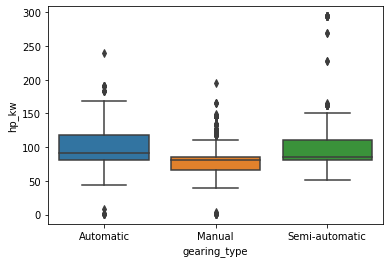

In [22]:
sns.boxplot(x="gearing_type", y="hp_kw", data=df);

In [23]:
df.groupby(["make_model", "body_type", "gearing_type"]).hp_kw.apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else df.hp_kw.mode()[0]))

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15048    147.0
15049    165.0
15050    146.0
15051    147.0
15052    165.0
Name: hp_kw, Length: 15053, dtype: float64

In [24]:
df.groupby(["make_model", "body_type", "gearing_type"]).hp_kw.describe().T

make_model       Audi A1                                                  \
body_type        Compact                                 Coupe     Other   
gearing_type   Automatic      Manual Semi-automatic     Manual Automatic   
count         434.000000  528.000000       3.000000   2.000000       3.0   
mean           82.744240   72.160985      75.000000  77.500000      85.0   
std            14.311659    8.633956       8.660254  10.606602       0.0   
min            66.000000   60.000000      70.000000  70.000000      85.0   
25%            70.000000   66.000000      70.000000  73.750000      85.0   
50%            85.000000   70.000000      70.000000  77.500000      85.0   
75%            85.000000   85.000000      77.500000  81.250000      85.0   
max           147.000000   92.000000      85.000000  85.000000      85.0   

make_model                                                                     \
body_type                                   Sedans                              
gearing_type     Manual Semi-automatic   Automatic      Manual Semi-automatic   
count          9.000000            1.0  637.000000  797.000000      52.000000   
mean          72.222222          140.0   81.679749   71.449184      79.326923   
std            7.949493            NaN   13.826341    8.442623      15.838302   
min           60.000000          140.0   60.000000   60.000000      66.000000   
25%           70.000000          140.0   70.000000   66.000000      66.000000   
50%           70.000000          140.0   85.000000   70.000000      85.000000   
75%           70.000000          140.0   85.000000   70.000000      85.000000   
max           85.000000          140.0  147.000000   92.000000     147.000000   

make_model                                       Audi A2     Audi A3  \
body_type    Station wagon                  Van Off-Road     Compact   
gearing_type     Automatic     Manual Automatic   Manual   Automatic   
count             8.000000  13.000000       1.0      1.0   68.000000   
mean             85.625000  68.692308     147.0     85.0   86.867647   
std              13.658462   9.498988       NaN      NaN    9.112734   
min              66.000000  60.000000     147.0     85.0   81.000000   
25%              81.250000  66.000000     147.0     85.0   81.000000   
50%              85.000000  66.000000     147.0     85.0   85.000000   
75%              92.000000  70.000000     147.0     85.0   85.000000   
max             110.000000  92.000000     147.0     85.0  112.000000   

make_model                                                                    \
body_type                               Convertible                    Coupe   
gearing_type      Manual Semi-automatic   Automatic Semi-automatic Automatic   
count          68.000000      14.000000    3.000000       5.000000       4.0   
mean           86.367647     113.500000  108.666667     133.600000      82.0   
std             8.821454      55.233421   27.024680      52.771204       2.0   
min            81.000000      85.000000   81.000000     110.000000      81.0   
25%            81.000000      85.000000   95.500000     110.000000      81.0   
50%            85.000000      97.500000  110.000000     110.000000      81.0   
75%            85.000000     110.000000  122.500000     110.000000      82.0   
max           135.000000     294.000000  135.000000     228.000000      85.0   

make_model                                                                     \
body_type          Other                                  Sedans                
gearing_type   Automatic      Manual Semi-automatic    Automatic       Manual   
count           5.000000    8.000000            3.0  1107.000000  1141.000000   
mean           88.400000   89.250000           85.0    88.901536    87.028046   
std            12.239281   12.925611            0.0    11.058053     9.013105   
min            81.000000   81.000000           85.0     9.000000    81.000000   
25%            81.000000   81.

In [25]:
df["hp_kw"] = df.groupby(["make_model", "body_type", "gearing_type"]).hp_kw.apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else df.hp_kw.mode()[0]))

### nr_of_doors

In [26]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11016
4.0     2872
3.0      823
2.0      194
NaN      146
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [27]:
df["nr_of_doors"] = df.groupby(["make_model", "body_type"]).nr_of_doors.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_doors.mode()[0]))

In [28]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11162
4.0     2872
3.0      823
2.0      194
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

### displacement_cc

In [29]:
df.displacement_cc.value_counts(dropna=False)

1598.0    4529
999.0     2383
1398.0    1288
1399.0     681
1229.0     673
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement_cc, Length: 78, dtype: int64

In [30]:
df[df["displacement_cc"].isnull()]["short_description"].notna().sum()

380

In [31]:
df["fill_displacement"] = df.short_description.str.extract("(\d\.\d)").astype(float)*1000
df.fill_displacement

0        1400.0
1        1800.0
2        1600.0
3        1400.0
4        1400.0
          ...  
15048       NaN
15049       NaN
15050       NaN
15051       NaN
15052       NaN
Name: fill_displacement, Length: 15053, dtype: float64

In [32]:
 df.groupby(["make_model", "body_type", "gearing_type"]).displacement_cc.describe().T

make_model        Audi A1                                                     \
body_type         Compact                                    Coupe     Other   
gearing_type    Automatic       Manual Semi-automatic       Manual Automatic   
count          430.000000   522.000000            3.0     2.000000       3.0   
mean          1161.830233  1138.457854          999.0  1298.500000     999.0   
std            249.138902   217.172687            0.0   423.556962       0.0   
min            929.000000   929.000000          999.0   999.000000     999.0   
25%            999.000000   999.000000          999.0  1148.750000     999.0   
50%            999.000000   999.000000          999.0  1298.500000     999.0   
75%           1395.000000  1422.000000          999.0  1448.250000     999.0   
max           1984.000000  1600.000000          999.0  1598.000000     999.0   

make_model                                                         \
body_type                                     Sedans                
gearing_type       Manual Semi-automatic   Automatic       Manual   
count            9.000000            0.0   629.00000   791.000000   
mean          1132.111111            NaN  1218.45628  1180.101138   
std            264.134173            NaN   266.45833   234.215620   
min            999.000000            NaN   999.00000   998.000000   
25%            999.000000            NaN   999.00000   999.000000   
50%            999.000000            NaN   999.00000   999.000000   
75%            999.000000            NaN  1422.00000  1422.000000   
max           1598.000000            NaN  1984.00000  1600.000000   

make_model                                                        Audi A2  \
body_type                   Station wagon                    Van Off-Road   
gearing_type Semi-automatic     Automatic       Manual Automatic   Manual   
count             51.000000      7.000000    13.000000       1.0      1.0   
mean            1342.862745   1314.714286  1270.769231    1984.0   1598.0   
std              276.520670    227.467737   228.952380       NaN      NaN   
min              999.000000    999.000000   999.000000    1984.0   1598.0   
25%              999.000000   1197.000000   999.000000    1984.0   1598.0   
50%             1422.000000   1395.000000  1422.000000    1984.0   1598.0   
75%             1598.000000   1408.500000  1422.000000    1984.0   1598.0   
max             1984.000000   1598.000000  1598.000000    1984.0   1598.0   

make_model        Audi A3                                           \
body_type         Compact                              Convertible   
gearing_type    Automatic       Manual Semi-automatic    Automatic   
count           68.000000    67.000000      14.000000     3.000000   
mean          1592.088235  1501.164179    1296.857143  1688.000000   
std            157.797408   212.839575     408.726513   247.588368   
min            999.000000   999.000000     999.000000  1498.000000   
25%           1598.000000  1395.000000     999.000000  1548.000000   
50%           1598.000000  1598.000000    1197.000000  1598.000000   
75%           1598.000000  1598.000000    1471.250000  1783.000000   
max           1968.000000  1968.000000    2480.000000  1968.000000   

make_model                                                       \
body_type                       Coupe        Other                
gearing_type Semi-automatic Automatic    Automatic       Manual   
count              5.000000      4.00     4.000000     7.000000   
mean            1856.600000   1448.25  1547.750000  1536.857143   
std              258.135236    299.50   101.837698   291.761563   
min             1395.000000    999.00  1395.000000   999.000000   
25%             1968.000000   1448.25  1547.250000  1496.500000   
50%             1968.000000   1598.00  1598.000000  1598.000000   
75%             1968.000000   1598.00  1598.500000  1600.000000   
max             1984.000000   1598.00  1600.000000  1968.000000   

ma

In [33]:
 df.groupby(["make_model", "body_type", "gearing_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15048    1997.0
15049    1798.0
15050    1997.0
15051    1997.0
15052    1798.0
Name: displacement_cc, Length: 15053, dtype: float64

In [34]:
df.displacement_cc.fillna(df["fill_displacement"], inplace=True)

In [35]:
df["displacement_cc"] = df.displacement_cc.round(-2)

In [36]:
df["displacement_cc"] = df.groupby(["make_model", "body_type", "gearing_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

### body_color

In [37]:
df.body_color.value_counts(dropna=False)

Black     3585
Grey      3333
White     3161
Silver    1581
Blue      1376
Red        868
NaN        544
Brown      278
Green      149
Beige       98
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [38]:
df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15048     Grey
15049     Grey
15050    White
15051     Grey
15052     Grey
Name: body_color, Length: 15053, dtype: object

In [39]:
df.drop("body_color", axis=1, inplace=True)

### nr_of_seats

In [40]:
df.nr_of_seats.value_counts(dropna=False)

5.0    12654
4.0     1088
NaN      895
7.0      317
2.0       96
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [41]:
df[["make_model", "body_type", "nr_of_doors", "nr_of_seats"]].value_counts(dropna=False).head(60)

make_model      body_type      nr_of_doors  nr_of_seats
Audi A3         Sedans         5.0          5.0            1817
Opel Insignia   Station wagon  5.0          5.0            1075
Opel Astra      Station wagon  5.0          5.0             825
                Sedans         5.0          5.0             736
Renault Clio    Sedans         5.0          5.0             685
Opel Corsa      Sedans         5.0          5.0             622
Audi A1         Sedans         5.0          5.0             558
Opel Insignia   Sedans         5.0          5.0             538
Opel Corsa      Compact        5.0          5.0             487
Audi A3         Sedans         4.0          5.0             460
Audi A1         Sedans         5.0          4.0             446
Opel Insignia   Station wagon  4.0          5.0             446
Audi A1         Compact        5.0          5.0             386
Renault Espace  Van            5.0          5.0             348
Opel Corsa      Compact        3.0          5.0 

In [42]:
df["nr_of_seats"] = df.groupby(["make_model", "body_type"]).nr_of_seats.fillna(method="ffill").fillna(method="bfill")

In [43]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13426
4.0     1156
7.0      362
2.0      106
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

### first_registration / age

In [44]:
df.first_registration.value_counts(dropna=False)

2018.0    4389
2016.0    3404
2017.0    2983
2019.0    2782
NaN       1495
Name: first_registration, dtype: int64

In [45]:
df["age"] = 2019 - df.first_registration

In [46]:
df.groupby("type").age.apply(lambda x: x.mode()[0]) 

type
Demonstration     0.0
Employee's car    1.0
New               0.0
Pre-registered    0.0
Used              3.0
Name: age, dtype: float64

In [47]:
df["age"] = df.groupby("type").age.apply(lambda x : x.fillna(x.mode()[0]))

In [48]:
df.drop("first_registration", axis=1, inplace=True)

### km

In [49]:
df.km.value_counts(dropna=False)

NaN       969
10.0      965
1.0       349
5.0       161
100.0     139
         ... 
6666.0      1
54.0        1
42.0        1
1794.0      1
57.0        1
Name: km, Length: 6690, dtype: int64

In [50]:
df.groupby(["type", "age"])["km"].describe()

count          mean           std      min       25%  \
type           age                                                          
Demonstration  0.0   602.0   3385.001661   3541.139303      3.0    500.00   
               1.0   130.0   8294.200000   7998.986641      8.0   1601.00   
               2.0    27.0  25327.296296  17914.687197     20.0  15470.50   
               3.0     2.0  45500.000000  14849.242405  35000.0  40250.00   
Employee's car 0.0   119.0   4489.462185   5503.982783      1.0    125.00   
               1.0   734.0  19393.668937   9381.857803      1.0  11300.00   
               2.0    98.0  37883.551020  22041.063256     59.0  21707.00   
               3.0    17.0  59123.647059  28115.753329   7790.0  40700.00   
New            0.0   747.0     17.496653     98.264462      0.0      5.00   
               1.0     2.0     53.500000     65.760931      7.0     30.25   
Pre-registered 0.0  1051.0    104.323501    664.403693      1.0      8.00   
               1.0   114.0    490.245614   2050.823562      1.0     10.00   
               2.0     8.0   2085.625000   4351.342976      1.0      7.75   
               3.0     1.0     10.000000           NaN     10.0     10.00   
Used           0.0   792.0   3755.885101   8547.647183      1.0     44.00   
               1.0  3373.0  18770.169286  10842.626199      1.0  10920.00   
               2.0  2849.0  42618.601264  28613.218068     15.0  22457.00   
               3.0  3418.0  76663.691925  39901.280369      5.0  46542.50   

                        50%       75%       max  
type           age                               
Demonstration  0.0   2900.0   5000.00   20000.0  
               1.0   5192.5  13737.50   38400.0  
               2.0  18900.0  28238.00   78000.0  
               3.0  45500.0  50750.00   56000.0  
Employee's car 0.0   3811.0   6224.50   37500.0  
               1.0  21050.0  26983.00   80009.0  
               2.0  37576.0  46500.00  112789.0  
               3.0  58962.0  84386.00  103000.0  
New            0.0     10.0     10.00    2500.0  
               1.0     53.5     76.75     100.0  
Pre-registered 0.0     10.0     20.00    9998.0  
               1.0     20.0    100.00   15378.0  
               2.0    110.0   1114.75   12300.0  
               3.0     10.0     10.00      10.0  
Used           0.0   1500.0   5000.00  127022.0  
               1.0  18100.0  25078.00  136000.0  
               2.0  35360.0  56585.00  317000.0  
               3.0  72492.0  99000.00  291800.0

In [51]:
df["km"] = df.groupby(["type", "age"])["km"].apply(lambda x : x.fillna(x.median()))

### vat

In [52]:
df.vat.value_counts(dropna=False)

VAT deductible      10530
NaN                  4097
Price negotiable      426
Name: vat, dtype: int64

In [53]:
df.groupby(["age"])["vat"].value_counts(dropna=False).head(30)

age  vat             
0.0  VAT deductible      3573
     NaN                  660
     Price negotiable       5
1.0  VAT deductible      3446
     NaN                  885
     Price negotiable      61
2.0  VAT deductible      1651
     NaN                 1188
     Price negotiable     144
3.0  VAT deductible      1860
     NaN                 1364
     Price negotiable     216
Name: vat, dtype: int64

In [54]:
df.drop("vat", axis=1, inplace=True)

### previous_owners

In [55]:
df.previous_owners.value_counts(dropna=False)

1.0    7977
NaN    6219
2.0     651
0.0     187
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [56]:
df[["age", "type", "previous_owners"]].head(60)

,age,type,previous_owners
0,3.0,Used,2.0
1,2.0,Used,NaN
2,3.0,Used,1.0
3,3.0,Used,1.0
4,3.0,Used,1.0
5,3.0,Used,1.0
6,3.0,Used,1.0
7,3.0,Used,1.0
8,3.0,Used,1.0
9,2.0,Used,NaN


In [57]:
df.groupby(["age", "type"])["previous_owners"].value_counts().head(15)

age  type            previous_owners
0.0  Demonstration   1.0                392
                     2.0                  1
     Employee's car  1.0                 72
                     2.0                  1
     New             0.0                163
                     1.0                 14
     Pre-registered  1.0                694
                     2.0                  5
     Used            1.0                364
                     2.0                  3
1.0  Demonstration   1.0                 94
                     2.0                  2
     Employee's car  1.0                507
                     2.0                  9
                     0.0                  4
Name: previous_owners, dtype: int64

In [58]:
df["previous_owners"] = df.groupby(["type", "age"])["previous_owners"].apply(lambda x : x.fillna(x.mode()[0]))

In [59]:
df.previous_owners.value_counts(dropna=False)

1.0    12828
0.0     1555
2.0      651
3.0       17
4.0        2
Name: previous_owners, dtype: int64

### cons_comb & cons_city &  cons_country

In [60]:
df[['cons_comb', 'cons_city','cons_country']].isnull().sum()

cons_comb       1948
cons_city       2344
cons_country    2284
dtype: int64

In [61]:
df["cons_comb"].fillna((df["cons_country"]*63 + df["cons_city"]*37)/100, inplace=True)

In [62]:
df.groupby(["body_type", "fuel", "displacement_cc", ]).cons_comb.describe().head(60)

count       mean  \
body_type   fuel                        displacement_cc                     
Compact     Benzine                     0.0                0.0        NaN   
                                        100.0              1.0   5.900000   
                                        300.0              1.0   4.800000   
                                        900.0            130.0   5.246923   
                                        1000.0           671.0   4.570194   
                                        1100.0            44.0   5.427273   
                                        1200.0           413.0   5.486925   
                                        1300.0             0.0        NaN   
                                        1400.0           884.0   5.645419   
                                        1500.0            24.0   5.200000   
                                        1600.0            32.0   6.015625   
                                        1800.0             3.0   6.133333   
                                        2000.0             8.0   6.000000   
                                        2500.0             1.0   8.300000   
                                        9800.0             1.0   4.800000   
            Diesel                      900.0              0.0        NaN   
                                        1200.0            15.0   3.413333   
                                        1400.0            35.0   3.900000   
                                        1500.0            23.0   3.291304   
                                        1600.0           104.0   3.660577   
                                        2000.0             7.0   4.442857   
            Diesel (Particulate Filter) 1200.0            21.0   3.752381   
                                        1300.0             0.0        NaN   
                                        1400.0            93.0   3.897849   
                                        1500.0            31.0   3.341935   
                                        1600.0           109.0   3.913761   
                                        2000.0             3.0   4.333333   
            Electric/Hybride            1400.0             0.0        NaN   
Convertible Benzine                     1400.0             1.0   4.900000   
                                        1500.0             1.0   5.100000   
                                        2000.0             1.0   7.100000   
            Diesel                      2000.0             1.0   5.100000   
            Diesel (Particulate Filter) 1600.0             1.0   3.800000   
                                        2000.0             3.0   4.633333   
Coupe       Benzine                     1000.0             3.0   4.566667   
                                        1200.0             4.0   5.300000   
                                        1400.0             4.0   5.600000   
                                        1600.0             1.0   5.900000   
            Diesel                      1200.0             0.0        NaN   
                                        1600.0             2.0   3.900000   
            Diesel (Particulate Filter) 1200.0             3.0   3.533333   
                                        1600.0             1.0   3.800000   
Off-Road    Benzine                     1200.0             1.0   5.500000   
                                        1400.0             4.0   5.275000   
                                        1500.0             1.0   5.700000   
                                        1600.0            26.0   9.500000   
                                        2000.0             8.0  10.000000   
            Diesel                      1500.0             1.0   1.200000   
                                        1600.0             1.0   4.700000   
                                        2000.0             4.0   6.100000   
            Diesel (Particulate Filter) 1600.0       

In [63]:
df.groupby(["make_model", "body_type", "fuel", "displacement_cc"])["cons_comb"].describe().T

make_model      Audi A1                                                      \
body_type       Compact                                                       
fuel            Benzine                                                       
displacement_cc 300.0     900.0       1000.0     1400.0     1500.0  1800.0    
count               1.0  5.000000  631.000000  68.000000  14.000000     2.0   
mean                4.8  4.240000    4.573376   5.010294   5.064286     5.8   
std                 NaN  0.089443    0.456475   0.151746   0.049725     0.0   
min                 4.8  4.200000    4.000000   4.700000   5.000000     5.8   
25%                 4.8  4.200000    4.400000   4.900000   5.000000     5.8   
50%                 4.8  4.200000    4.500000   5.000000   5.100000     5.8   
75%                 4.8  4.200000    4.800000   5.125000   5.100000     5.8   
max                 4.8  4.400000   13.800000   5.200000   5.100000     5.8   

make_model                                             \
body_type                                               
fuel                                Diesel              
displacement_cc 2000.0  9800.0     1400.0     1600.0    
count               8.0     1.0  34.000000  26.000000   
mean                6.0     4.8   3.841176   3.653846   
std                 0.0     NaN   0.265282   0.273102   
min                 6.0     4.8   3.000000   3.000000   
25%                 6.0     4.8   3.700000   3.700000   
50%                 6.0     4.8   3.800000   3.700000   
75%                 6.0     4.8   4.100000   3.700000   
max                 6.0     4.8   4.100000   4.000000   

make_model                                                      \
body_type                                                Coupe   
fuel            Diesel (Particulate Filter)            Benzine   
displacement_cc                     1400.0     1600.0  1000.0    
count                             93.000000  41.000000     1.0   
mean                               3.897849   3.851220     4.2   
std                                0.178142   0.138061     NaN   
min                                3.400000   3.500000     4.2   
25%                                3.800000   3.700000     4.2   
50%                                3.900000   3.800000     4.2   
75%                                4.100000   4.000000     4.2   
max                                4.100000   4.000000     4.2   

make_model                                                     \
body_type                                       Other           
fuel            Diesel (Particulate Filter)   Benzine           
displacement_cc                     1600.0    1000.0  1600.0    
count                                   0.0  5.000000     1.0   
mean                                    NaN  4.660000     5.8   
std                                     NaN  0.260768     NaN   
min                                     NaN  4.200000     5.8   
25%                                     NaN  4.700000     5.8   
50%                                     NaN  4.800000     5.8   
75%                                     NaN  4.800000     5.8   
max                                     NaN  4.800000     5.8   

make_model                                                                  \
body_type                                        Sedans                      
fuel            Diesel (Particulate Filter)     Benzine                      
displacement_cc                     1600.0      1000.0  1200.0     1400.0    
count                                   2.0  787.000000     1.0  75.000000   
mean                                    3.8    4.805186     4.2   4.972000   
std                                     0.0    3.587624     NaN   0.186403   
min                                     3.8    3.900000     4.2   4.700000   
25%                                     3.8    4.200000     4.2   4.900000   
50%                                     3.8    4.400000     4.2   4.900000   
75%         

In [64]:
df["cons_comb"] = df.groupby(["make_model", "body_type", "fuel","displacement_cc"]).cons_comb.apply(lambda x: x.fillna(x.interpolate().ffill().bfill()).fillna(df["cons_comb"].mode()[0]))

In [65]:
df.drop(columns=["cons_city", "cons_country"], axis=True, inplace=True)

### inspection_new

In [66]:
df.inspection_new.value_counts(dropna=False)

NaN                                                                11242
YesEuro 6                                                            519
Yes                                                                  427
Yes102 g CO2/km (comb)                                               174
Yes4 (Green)                                                         166
                                                                   ...  
Yes100 g CO2/km (comb)                                                 1
Yes4.9 l/100 km (comb)5.9 l/100 km (city)4.3 l/100 km (country)        1
Yes5.1 l/100 km (comb)6.4 l/100 km (city)4.3 l/100 km (country)        1
Yes6.3 l/100 km (comb)                                                 1
Yes172 g CO2/km (comb)                                                 1
Name: inspection_new, Length: 202, dtype: int64

In [67]:
df[["type", "inspect_new"]].value_counts(dropna=False)

type            inspect_new
Used            NaN            7815
                Yes            2633
New             NaN            1146
Pre-registered  NaN             936
Employee's car  NaN             792
Demonstration   NaN             553
New             Yes             402
Pre-registered  Yes             351
Demonstration   Yes             241
Employee's car  Yes             184
dtype: int64

In [68]:
df.drop("inspect_new", axis=1, inplace=True)

### warranty_month

In [69]:
df.warranty_month.value_counts(dropna=False).head(10)

NaN     10521
12.0     2347
24.0     1075
60.0      392
36.0      261
48.0      145
6.0       125
72.0       59
3.0        33
23.0       11
Name: warranty_month, dtype: int64

In [70]:
df.groupby(["make_model", "age"]).warranty_month.value_counts()

make_model      age  warranty_month
Audi A1         0.0  24.0              102
                     12.0               38
                     36.0               26
                     48.0               15
                     60.0               14
                                      ... 
Renault Espace  3.0  11.0                1
                     21.0                1
                     36.0                1
                     40.0                1
                     48.0                1
Name: warranty_month, Length: 230, dtype: int64

In [71]:
df.drop("warranty_month", axis=1, inplace=True)

### gearing_type

In [72]:
df.gearing_type.value_counts(dropna=False)

Manual            7681
Automatic         6905
Semi-automatic     467
Name: gearing_type, dtype: int64

### gears

In [73]:
df.gears.value_counts(dropna=False)

6.0     5501
NaN     4340
5.0     3138
7.0     1844
8.0      216
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [74]:
df.groupby(["make_model", "body_type", "gearing_type"])["gears"].describe().tail(60)

count      mean       std  min  \
make_model     body_type     gearing_type                                     
Opel Corsa     Compact       Manual          379.0  5.039578  0.195223  5.0   
                             Semi-automatic   11.0  4.636364  1.206045  1.0   
               Coupe         Automatic         1.0  5.000000       NaN  5.0   
                             Manual            9.0  5.111111  0.333333  5.0   
                             Semi-automatic    1.0  5.000000       NaN  5.0   
               Off-Road      Manual            3.0  5.333333  0.577350  5.0   
               Other         Automatic         8.0  5.875000  0.353553  5.0   
                             Manual           73.0  5.054795  0.229154  5.0   
               Sedans        Automatic       196.0  5.790816  0.407767  5.0   
                             Manual          534.0  5.009363  0.178345  2.0   
                             Semi-automatic   25.0  5.160000  0.374166  5.0   
               Transporter   Manual            7.0  5.000000  0.000000  5.0   
               Van           Manual            0.0       NaN       NaN  NaN   
Opel Insignia  Compact       Automatic         9.0  6.222222  0.666667  6.0   
                             Manual           16.0  6.000000  0.000000  6.0   
               Coupe         Manual            0.0       NaN       NaN  NaN   
               Off-Road      Automatic         3.0  7.333333  1.154701  6.0   
                             Manual            3.0  6.000000  0.000000  6.0   
               Other         Automatic         4.0  6.500000  1.000000  6.0   
                             Manual           36.0  6.000000  0.000000  6.0   
               Sedans        Automatic       271.0  6.335793  0.775655  5.0   
                             Manual          366.0  6.005464  0.104542  6.0   
               Station wagon Automatic       631.0  6.502377  0.872641  5.0   
                             Manual          455.0  6.006593  0.140642  5.0   
               Van           Manual            1.0  6.000000       NaN  6.0   
Renault Clio   Compact       Automatic        61.0  5.918033  0.690292  1.0   
                             Manual          132.0  5.015152  0.122621  5.0   
                             Semi-automatic    1.0  6.000000       NaN  6.0   
               Coupe         Automatic         1.0  6.000000       NaN  6.0   
               Off-Road      Automatic         1.0  6.000000       NaN  6.0   
                             Manual            1.0  5.000000       NaN  5.0   
               Other         Automatic         6.0  6.000000  0.000000  6.0   
                             Manual           19.0  5.000000  0.000000  5.0   
               Sedans        Automatic       182.0  5.967033  0.179043  5.0   
                             Manual          493.0  5.101420  2.028721  5.0   
                             Semi-automatic   37.0  6.000000  0.000000  6.0   
               Station wagon Automatic        72.0  6.000000  0.167836  5.0   
                             Manual          163.0  5.024540  0.155195  5.0   
                             Semi-automatic    6.0  6.000000  0.000000  6.0   
               Transporter   Manual           11.0  5.000000  0.000000  5.0   
               Van           Manual            0.0       NaN       NaN  NaN   
Renault Duster Off-Road      Automatic         0.0       NaN       NaN  NaN   
                             Manual           25.0  6.000000  0.000000  6.0   
Renault Espace Compact       Automatic         5.0  6.200000  0.447214  6.0   
               Coupe         Automatic         0.0       NaN       NaN  NaN   
               Off-Road      Automatic         5.0  5.600000  0.547723  5.0   
                             Manual            1.0  6.000000       NaN  6.0   
               Other         Automatic         4.0  6.250000  0.500000  6.0   
                             Manual            0.0       NaN       NaN  NaN   
               S

In [75]:
df["gears"] = df.groupby(["make_model", "body_type", "gearing_type"])["gears"].apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else df.gears.mode()[0]))

In [76]:
df.gears.value_counts(dropna=False)

6.0     8094
5.0     4057
7.0     2671
8.0      217
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

### cylinders

In [77]:
df.cylinders.value_counts(dropna=False)

4.0    7692
NaN    5265
3.0    2066
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [78]:
df.groupby(["make_model", "body_type", "displacement_cc","hp_kw"]).cylinders.describe().head(60)

count      mean       std  \
make_model body_type     displacement_cc hp_kw                              
Audi A1    Compact       300.0           85.0     0.0       NaN       NaN   
                         900.0           60.0     0.0       NaN       NaN   
                                         70.0     0.0       NaN       NaN   
                         1000.0          60.0    35.0  3.028571  0.169031   
                                         70.0   187.0  3.037433  0.379147   
                                         71.0    32.0  3.000000  0.000000   
                                         85.0   128.0  3.007812  0.088388   
                         1400.0          66.0    66.0  3.030303  0.172733   
                                         92.0    38.0  4.000000  0.000000   
                                         93.0     1.0  4.000000       NaN   
                                         110.0    4.0  4.000000  0.000000   
                         1500.0          110.0   12.0  4.000000  0.000000   
                         1600.0          66.0     1.0  3.000000       NaN   
                                         70.0     0.0       NaN       NaN   
                                         85.0    41.0  4.000000  0.000000   
                                         86.0     0.0       NaN       NaN   
                         1800.0          141.0    2.0  4.000000  0.000000   
                         2000.0          147.0    5.0  4.000000  0.000000   
                         9800.0          85.0     0.0       NaN       NaN   
           Coupe         1000.0          70.0     1.0  3.000000       NaN   
                         1600.0          85.0     0.0       NaN       NaN   
           Other         1000.0          60.0     1.0  3.000000       NaN   
                                         70.0     0.0       NaN       NaN   
                                         85.0     3.0  3.000000  0.000000   
                         1600.0          85.0     2.0  4.000000  0.000000   
                                         140.0    1.0  4.000000       NaN   
           Sedans        1000.0          60.0    73.0  3.013699  0.117041   
                                         70.0   333.0  3.018018  0.133217   
                                         71.0     1.0  3.000000       NaN   
                                         85.0   243.0  3.004115  0.064150   
                                         92.0     0.0       NaN       NaN   
                         1200.0          70.0     0.0       NaN       NaN   
                         1400.0          66.0   226.0  3.000000  0.000000   
                                         67.0     1.0  3.000000       NaN   
                                         92.0    61.0  4.000000  0.000000   
                                         93.0     0.0       NaN       NaN   
                                         110.0    7.0  4.000000  0.000000   
                                         112.0    0.0       NaN       NaN   
                         1500.0          110.0    1.0  4.000000       NaN   
                         1600.0          66.0     3.0  4.000000  0.000000   
                                         85.0   179.0  3.994413  0.074744   
                                         87.0     1.0  4.000000       NaN   
                         1800.0          141.0   10.0  4.000000  0.000000   
                         2000.0          147.0    3.0  4.000000  0.000000   
           Station wagon 1000.0          60.0     1.0  3.000000       NaN   
                                         70.0     3.0  3.000000  0.000000   
                                         85.0     0.0       NaN       NaN   
                         1400.0          66.0     6.0  3.000000  0.000000   
                                         85.0     0.0       NaN       NaN   
                                         92.0     3.0  4.000000  0.000000   
                                         110

In [79]:
df["cylinders"] = df.groupby(["make_model", "body_type", "displacement_cc", "hp_kw"]).cylinders.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.cylinders.mode()[0]))

### drive chain

In [80]:
df.drive_chain.value_counts(dropna=False)

front    8411
NaN      6486
4WD       152
rear        4
Name: drive_chain, dtype: int64

In [81]:
df[[ "make_model", "body_type", "drive_chain"]].value_counts(dropna=False).head(60)

make_model      body_type      drive_chain
Audi A3         Sedans         front          1608
Audi A1         Sedans         front           962
Opel Insignia   Station wagon  front           863
Audi A3         Sedans         NaN             860
Audi A1         Compact        front           664
Opel Astra      Station wagon  front           655
Opel Insignia   Station wagon  NaN             649
Opel Corsa      Compact        front           599
                               NaN             593
Opel Astra      Sedans         front           539
Audi A1         Sedans         NaN             523
Opel Corsa      Sedans         front           514
Opel Astra      Station wagon  NaN             510
Renault Clio    Sedans         NaN             472
Opel Astra      Sedans         NaN             451
Opel Insignia   Sedans         front           435
Renault Espace  Van            front           368
Opel Insignia   Sedans         NaN             364
Renault Clio    Sedans         front   

In [82]:
df.groupby(["make_model", "body_type"])["drive_chain"].apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else df.drive_chain.mode()[0]))

0        front
1        front
2        front
3        front
4        front
         ...  
15048    front
15049    front
15050    front
15051    front
15052      4WD
Name: drive_chain, Length: 15053, dtype: object

In [83]:
df["drive_chain"] = df.groupby(["make_model", "body_type"])["drive_chain"].apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else df.drive_chain.mode()[0]))

In [84]:
df.drive_chain.value_counts()

front    14864
4WD        185
rear         4
Name: drive_chain, dtype: int64

### co_2_emission

In [85]:
df.co_2_emission.value_counts(dropna=False)

NaN       2307
120.0      668
99.0       537
97.0       514
102.0      471
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co_2_emission, Length: 123, dtype: int64

In [86]:
df.groupby(["make_model", "body_type", "cons_comb"])["co_2_emission"].describe().T

make_model   Audi A1                                                     \
body_type    Compact                                                      
cons_comb  3.000000  3.350000   3.400000  3.500000  3.533333  3.550000    
count            0.0       0.0   6.000000       1.0       0.0       0.0   
mean             NaN       NaN  91.833333      92.0       NaN       NaN   
std              NaN       NaN   2.562551       NaN       NaN       NaN   
min              NaN       NaN  90.000000      92.0       NaN       NaN   
25%              NaN       NaN  91.000000      92.0       NaN       NaN   
50%              NaN       NaN  91.000000      92.0       NaN       NaN   
75%              NaN       NaN  91.000000      92.0       NaN       NaN   
max              NaN       NaN  97.000000      92.0       NaN       NaN   

make_model                                                                \
body_type                                                                  
cons_comb  3.600000  3.650000  3.666667    3.700000  3.800000  3.833333    
count            5.0       0.0       0.0   47.000000      18.0       0.0   
mean            94.0       NaN       NaN   97.148936      99.0       NaN   
std              0.0       NaN       NaN    1.083046       0.0       NaN   
min             94.0       NaN       NaN   91.000000      99.0       NaN   
25%             94.0       NaN       NaN   97.000000      99.0       NaN   
50%             94.0       NaN       NaN   97.000000      99.0       NaN   
75%             94.0       NaN       NaN   97.000000      99.0       NaN   
max             94.0       NaN       NaN  100.000000      99.0       NaN   

make_model                                                                    \
body_type                                                                      
cons_comb  3.900000  3.966667    4.000000    4.100000    4.200000  4.266667    
count           41.0       0.0   31.000000   38.000000   87.000000       0.0   
mean           102.0       NaN  104.806452  108.605263   97.735632       NaN   
std              0.0       NaN    2.039924    0.754786    3.225840       NaN   
min            102.0       NaN   97.000000  107.000000   97.000000       NaN   
25%            102.0       NaN  104.000000  109.000000   97.000000       NaN   
50%            102.0       NaN  106.000000  109.000000   97.000000       NaN   
75%            102.0       NaN  106.000000  109.000000   97.000000       NaN   
max            102.0       NaN  106.000000  109.000000  116.000000       NaN   

make_model                                                                \
body_type                                                                  
cons_comb  4.300000  4.300000  4.333333    4.400000  4.450000  4.500000    
count           16.0       0.0       0.0  183.000000       0.0      11.0   
mean            98.0       NaN       NaN  102.814208       NaN     103.0   
std              0.0       NaN       NaN    0.954121       NaN       0.0   
min             98.0       NaN       NaN  100.000000       NaN     103.0   
25%             98.0       NaN       NaN  102.000000       NaN     103.0   
50%             98.0       NaN       NaN  102.000000       NaN     103.0   
75%             98.0       NaN       NaN  104.000000       NaN     103.0   
max             98.0       NaN       NaN  104.000000       NaN     103.0   

make_model                                                                    \
body_type                                                                      
cons_comb    4.600000  4.650000    4.700000  4.750000    4.800000  4.850000    
count        51.000000       0.0   33.000000       0.0   93.000000       0.0   
mean        104.352941       NaN  106.666667       NaN  109.408602       NaN   
std           1.383091       NaN    1.361678       NaN    2.520510       NaN   
min         102.000000       NaN  106.000000       NaN  102.000000       NaN   
25%         104.000000       NaN  106.000000       NaN  108

In [87]:
df.groupby(["make_model", "body_type", "cons_comb"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15048    139.0
15049    168.0
15050    139.0
15051    139.0
15052    153.0
Name: co_2_emission, Length: 15053, dtype: float64

In [88]:
#df.next_inspection.str.extract(r"\d+/\d{0,4}(\d+)\sg").astype(float)

In [89]:
#df["fill_inspect"] = df.next_inspection.str.extract(r"\d+/\d{0,4}(\d+)\sg").astype(float)

In [90]:
#df[df.co_2_emission.isnull()]["fill_inspect"].notna().sum()

In [91]:
#df["fill_smoking"] = df.non_smoking_vehicle.str.extract(r"(\d+)\sg").astype(float)

In [92]:
#f[df.co_2_emission.isnull()]["fill_smoking"].notna().sum()

In [93]:
#df["fill_inspect_new"] = df.non_smoking_vehicle.str.extract(r"Yes(\d+)\sg").astype(float)

In [94]:
#df[df.co_2_emission.isnull()]["fill_inspect_new"].notna().sum()

In [95]:
#df["fill_service"] = df.full_service.str.extract(r"(\d+)\sg").astype(float)

In [96]:
#df[df.co_2_emission.isnull()]["fill_service"].notna().sum()

In [97]:
df["co_2_emission"] = df.groupby(["make_model", "body_type", "cons_comb"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

In [98]:
df.co_2_emission.isnull().sum()

856

In [99]:
df["co_2_emission"] = df["co_2_emission"].fillna(df.co_2_emission.mode()[0])

### emission_class

In [100]:
df.emission_class.value_counts(dropna=False)

Euro 6          9554
NaN             3428
Euro 6d-TEMP    1764
Euro 6c          127
Euro 5            78
Euro 6d           62
Euro 4            40
Name: emission_class, dtype: int64

In [101]:
df.groupby(["make_model", "fuel", "gearing_type"]).emission_class.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.emission_class.mode()[0]))

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15048          Euro 6
15049          Euro 6
15050    Euro 6d-TEMP
15051          Euro 6
15052          Euro 6
Name: emission_class, Length: 15053, dtype: object

In [102]:
df.drop("emission_class", axis=1, inplace=True)

### comfort_convenience

In [103]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  808
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   214
Air conditioning,Elect

In [104]:
df.groupby(["make_model", "body_type", "age"])["comfort_convenience"].value_counts(dropna=False).head()

make_model  body_type  age  comfort_convenience                                                                                                                                                                                                                                                                                                                            
Audi A1     Compact    0.0  Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                       24
                            NaN                                                                                                                                                                                                                                           

In [105]:
df["comfort_convenience"] = df.groupby(["make_model", "body_type", "age"])["comfort_convenience"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0]))

### entertainment_media

In [106]:
df.entertainment_media.value_counts(dropna=False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                     1246
NaN                                                                                            1208
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                  969
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                        769
Radio                                                                                           461
                                                                                               ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,On-board computer,Radio,Sound system       1
Bluetooth,Sound system,USB                                                                        1
CD player,Digital radio,Radio                                                                     1
Bluetooth,CD player,Digital radio,Hands-free equipment                                            1


In [107]:
 df["entertainment_media"] = df.groupby(["make_model", "body_type", "gearing_type", "age"])["entertainment_media"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0]))

### extras

In [108]:
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                               2987
NaN                                                                                                        2733
Alloy wheels,Touch screen                                                                                   656
Alloy wheels,Voice Control                                                                                  549
Alloy wheels,Touch screen,Voice Control                                                                     516
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [109]:
df["extras"] = df.groupby(["make_model", "body_type", "age", "gearing_type"])["extras"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.extras.mode()[0]))

### safety_security

In [110]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               852
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      502
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [111]:
df["safety_security"] = df.groupby(["make_model", "body_type", "age", "gearing_type"])["safety_security"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0]))

### upholstery_color

In [112]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8135
NaN             4102
Part leather    1386
Full leather     976
Other            337
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [113]:
df.groupby(["make_model", "body_type", "gearing_type"])["upholstery_color"].describe().T

make_model     Audi A1                                                \
body_type      Compact                        Coupe     Other          
gearing_type Automatic Manual Semi-automatic Manual Automatic Manual   
count              378    447              3      1         3      3   
unique               4      4              1      1         1      1   
top              Black  Black          Black  Other     Black  Black   
freq               266    410              3      1         3      3   

make_model                                                                 \
body_type                      Sedans                       Station wagon   
gearing_type Semi-automatic Automatic Manual Semi-automatic     Automatic   
count                     0       422    528             20             7   
unique                    0         7      5              3             2   
top                     NaN     Black  Black          Black         Black   
freq                    NaN       307    434             14             6   

make_model                     Audi A2   Audi A3                        \
body_type                 Van Off-Road   Compact                         
gearing_type Manual Automatic   Manual Automatic Manual Semi-automatic   
count            12         1        1        37     52             14   
unique            1         1        1         3      3              1   
top           Black     Black    Black     Black  Black          Black   
freq             12         1        1        33     44             14   

make_model                                                          \
body_type    Convertible                    Coupe     Other          
gearing_type   Automatic Semi-automatic Automatic Automatic Manual   
count                  2              2         3         4      4   
unique                 2              2         1         2      2   
top                Brown          Black     Black     Black  Black   
freq                   1              1         3         3      3   

make_model                                                                 \
body_type                      Sedans                       Station wagon   
gearing_type Semi-automatic Automatic Manual Semi-automatic     Automatic   
count                     2       759    736             92            85   
unique                    1         6      7              5             4   
top                    Grey     Black  Black          Black         Black   
freq                      2       488    556             72            70   

make_model                         Opel Astra                                  \
body_type                             Compact                           Coupe   
gearing_type Manual Semi-automatic  Automatic Manual Semi-automatic Automatic   
count           122              1         28     25              2         2   
unique            3              1          4      2              1         2   
top           Black          Black      Black  Black          Black     Black   
freq             99              1         23     23              2         1   

make_model                                                               \
body_type     Off-Road     Other           Sedans                         
gearing_type Automatic Automatic Manual Automatic Manual Semi-automatic   
count                1         0     13       307    417              7   
unique               1         0      2         4      3              3   
top               Grey       NaN  Black     Black  Black          Black   
freq                 1       NaN     11       252    324              5   

make_model                                       Opel Corsa         \
body_type    Station wagon                          Compact          
gearing_type     Automatic Manual Semi-automatic  Automatic Manual   
count                  502    379              3        524    452   
unique                   4     

In [114]:
df.drop("upholstery_color", axis=1, inplace=True)

### upholstery_type

In [115]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8135
NaN             4102
Part leather    1386
Full leather     976
Other            337
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [116]:
df.groupby(["make_model", "body_type", "gearing_type"]).upholstery_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

0               Cloth
1               Cloth
2               Cloth
3               Cloth
4               Cloth
             ...     
15048    Full leather
15049           Cloth
15050    Full leather
15051    Part leather
15052    Full leather
Name: upholstery_type, Length: 15053, dtype: object

In [117]:
df.groupby(["make_model", "body_type",  "gearing_type"]).upholstery_type.describe().T

make_model     Audi A1                                                       \
body_type      Compact                               Coupe     Other          
gearing_type Automatic Manual Semi-automatic        Manual Automatic Manual   
count              395    453              3             1         3      9   
unique               6      5              3             1         1      1   
top              Cloth  Cloth          Cloth  Part leather     Cloth  Cloth   
freq               326    414              1             1         3      9   

make_model                                                                 \
body_type                      Sedans                       Station wagon   
gearing_type Semi-automatic Automatic Manual Semi-automatic     Automatic   
count                     0       427    538             21             7   
unique                    0         6      6              5             3   
top                     NaN     Cloth  Cloth          Cloth         Cloth   
freq                    NaN       348    495             12             4   

make_model                     Audi A2   Audi A3                        \
body_type                 Van Off-Road   Compact                         
gearing_type Manual Automatic   Manual Automatic Manual Semi-automatic   
count            11         0        1        24     41             13   
unique            1         0        1         3      3              2   
top           Cloth       NaN    Cloth     Cloth  Cloth   Part leather   
freq             11       NaN        1        14     30             12   

make_model                                                                   \
body_type      Convertible                    Coupe     Other                 
gearing_type     Automatic Semi-automatic Automatic Automatic        Manual   
count                    2              3         3         4             4   
unique                   2              2         1         1             3   
top           Part leather   Part leather     Cloth     Cloth  Part leather   
freq                     1              2         3         4             2   

make_model                                                                 \
body_type                      Sedans                       Station wagon   
gearing_type Semi-automatic Automatic Manual Semi-automatic     Automatic   
count                     2       767    786             91            92   
unique                    1         6      6              6             6   
top                  Velour     Cloth  Cloth          Cloth         Cloth   
freq                      2       605    643             56            69   

make_model                         Opel Astra                        \
body_type                             Compact                         
gearing_type Manual Semi-automatic  Automatic Manual Semi-automatic   
count           142              1         35     28              4   
unique            4              1          4      2              1   
top           Cloth   Part leather      Cloth  Cloth          Cloth   
freq            118              1         26     27              4   

make_model                                                                  \
body_type            Coupe      Off-Road     Other           Sedans          
gearing_type     Automatic     Automatic Automatic Manual Automatic Manual   
count                    2             1         0      6       331    502   
unique                   2             1         0      2         6      5   
top           Part leather  Part leather       NaN  Cloth     Cloth  Cloth   
freq                     1             1       NaN      5       255    449   

make_model                                                      Opel Corsa  \
body_type                   Station wagon                          Compact   
gearing_type Semi-automatic     Automatic Manual Semi-automatic  Automatic   
count         

In [118]:
df["upholstery_type"] = df.groupby(["make_model", "body_type",  "gearing_type"]).upholstery_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

In [119]:
df.upholstery_type.value_counts()

Cloth           11876
Part leather     1430
Full leather     1284
Other             345
Velour             61
alcantara          57
Name: upholstery_type, dtype: int64

### weight_kg

In [120]:
df.weight_kg.value_counts(dropna=False)

NaN       6558
1163.0     561
1360.0     334
1165.0     276
1335.0     242
          ... 
1213.0       1
1960.0       1
1258.0       1
1167.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64

In [121]:
df.groupby(["make_model", "body_type", "cylinders"]).weight_kg.describe().T

make_model      Audi A1                                                      \
body_type       Compact                     Coupe        Other                
cylinders           3.0          4.0  8.0     3.0  4.0     3.0          4.0   
count        410.000000    84.000000  0.0     1.0  0.0     1.0     3.000000   
mean        1160.085366  1241.333333  NaN  1010.0  NaN  1230.0  1206.666667   
std           89.317324   116.673505  NaN     NaN  NaN     NaN    42.524503   
min          102.000000  1110.000000  NaN  1010.0  NaN  1230.0  1165.000000   
25%         1135.000000  1180.000000  NaN  1010.0  NaN  1230.0  1185.000000   
50%         1165.000000  1220.000000  NaN  1010.0  NaN  1230.0  1205.000000   
75%         1195.000000  1250.000000  NaN  1010.0  NaN  1230.0  1227.500000   
max         1675.000000  1792.000000  NaN  1010.0  NaN  1230.0  1250.000000   

make_model                                                            Audi A2  \
body_type        Sedans              Station wagon               Van Off-Road   
cylinders           3.0          4.0           3.0          4.0  4.0      4.0   
count        702.000000   202.000000      9.000000     5.000000  0.0      0.0   
mean        1243.556980  1310.866337   1231.111111  1224.000000  NaN      NaN   
std          173.929115   172.585308    132.895113    80.498447  NaN      NaN   
min         1035.000000  1110.000000   1135.000000  1125.000000  NaN      NaN   
25%         1135.000000  1215.000000   1195.000000  1215.000000  NaN      NaN   
50%         1180.000000  1250.000000   1195.000000  1215.000000  NaN      NaN   
75%         1230.000000  1275.000000   1205.000000  1215.000000  NaN      NaN   
max         1680.000000  1720.000000   1580.000000  1350.000000  NaN      NaN   

make_model      Audi A3                                                       \
body_type       Compact                       Convertible Coupe                
cylinders           3.0          4.0     5.0          4.0   3.0          4.0   
count         17.000000   108.000000     1.0     7.000000   0.0     3.000000   
mean        1174.058824  1341.611111  1485.0  1519.285714   NaN  1260.000000   
std           35.952174   181.231139     NaN   129.113276   NaN    17.320508   
min         1155.000000  1180.000000  1485.0  1355.000000   NaN  1250.000000   
25%         1155.000000  1260.000000  1485.0  1415.000000   NaN  1250.000000   
50%         1155.000000  1285.000000  1485.0  1555.000000   NaN  1250.000000   
75%         1155.000000  1316.000000  1485.0  1605.000000   NaN  1265.000000   
max         1255.000000  1890.000000  1485.0  1685.000000   NaN  1280.000000   

make_model                                                              \
body_type    Other                    Sedans                             
cylinders      3.0          4.0          3.0          4.0          5.0   
count          1.0     2.000000   235.000000  1325.000000    18.000000   
mean        1205.0  1375.000000  1353.693617  1403.573585  1581.388889   
std            NaN    28.284271   197.879463   168.187472    23.060378   
min         1205.0  1355.000000  1180.000000  1041.000000  1490.000000   
25%         1205.0  1365.000000  1255.000000  1335.000000  1585.000000   
50%         1205.0  1375.000000  1275.000000  1355.000000  1585.000000   
75%         1205.0  1385.000000  1280.000000  1370.000000  1585.000000   
max         1205.0  1395.000000  1790.000000  1905.000000  1595.000000   

make_model                                      Opel Astra               \
body_type  Station wagon                           Compact                
cylinders            3.0          4.0     5.0          3.0          4.0   
count          36.000000    76.000000     1.0    15.000000    67.000000   
mean         1238.333333  1352.763158  1585.0  1176.333333  1312.865672   
std            45.685259    40.483698     NaN    35.186578    58.473484   
min          1180.000000  1255.000000  1585.0  1163.000000  1198.000000   
25%          1180

In [122]:
df.groupby(["make_model", "body_type", "cylinders"]).weight_kg.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.weight_kg.mode()[0]))

0        1220.0
1        1255.0
2        1275.0
3        1195.0
4        1135.0
          ...  
15048    1758.0
15049    1708.0
15050    1734.0
15051    1758.0
15052    1685.0
Name: weight_kg, Length: 15053, dtype: float64

In [123]:
df["weight_kg"] = df.groupby(["make_model", "body_type", "cylinders"]).weight_kg.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.weight_kg.mode()[0])).astype(float)

### paint_type

In [124]:
df.paint_type.value_counts(dropna=False)

Metallic       9276
NaN            5426
Uni/basic       345
Perl effect       6
Name: paint_type, dtype: int64

In [125]:
df.groupby(["make_model","body_type", "age", "upholstery_type"]).paint_type.describe().T

make_model        Audi A1                                                \
body_type         Compact                                                 
age                   0.0                                                 
upholstery_type     Cloth Full leather     Other Part leather    Velour   
count                 205            1         7            7         3   
unique                  2            1         1            1         1   
top              Metallic     Metallic  Metallic     Metallic  Metallic   
freq                  204            1         7            7         3   

make_model                                                               \
body_type                                                                 
age                             1.0                                       
upholstery_type alcantara     Cloth Full leather     Other Part leather   
count                   0       173            3        16           17   
unique                  0         1            1         1            1   
top                   NaN  Metallic     Metallic  Metallic     Metallic   
freq                  NaN       173            3        16           17   

make_model                                                            \
body_type                                                              
age                             2.0                                    
upholstery_type    Velour     Cloth     Other Part leather    Velour   
count                   2        98         1            5         1   
unique                  1         2         1            1         1   
top              Metallic  Metallic  Metallic     Metallic  Metallic   
freq                    2        97         1            5         1   

make_model                                                               \
body_type                                                                 
age                             3.0                                       
upholstery_type alcantara     Cloth Full leather     Other Part leather   
count                   2       132            2         4           11   
unique                  1         2            1         1            1   
top              Metallic  Metallic     Metallic  Metallic     Metallic   
freq                    2       130            2         4           11   

make_model                                                                     \
body_type                        Coupe                  Other                   
age                                2.0          3.0       0.0       1.0   2.0   
upholstery_type alcantara Part leather Part leather     Cloth     Cloth Cloth   
count                   2            1            1         7         3     0   
unique                  1            1            1         1         1     0   
top              Metallic     Metallic     Metallic  Metallic  Metallic   NaN   
freq                    2            1            1         7         3   NaN   

make_model                                                                  \
body_type          Sedans                                                    
age                   0.0                                                    
upholstery_type     Cloth Full leather     Other Part leather       Velour   
count                 256            2         3            9            2   
unique                  2            1         2            2            2   
top              Metallic     Metallic  Metallic     Metallic  Perl effect   
freq                  242            2         2            8            1   

make_model                                                               \
body_type                                                                 
age                   1.0                                                 
upholstery_type     Cloth Full leather     Other Part leather    Velour   
count                 316            6        

In [126]:
df["paint_type"] = df.groupby(["make_model","body_type", "age", "upholstery_type"]).paint_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.paint_type.mode()[0]))

In [127]:
df.paint_type.value_counts(dropna=False)

Metallic       14664
Uni/basic        383
Perl effect        6
Name: paint_type, dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15053 non-null  object 
 1   short_description    15007 non-null  object 
 2   body_type            15053 non-null  object 
 3   price                15053 non-null  int64  
 4   km                   15053 non-null  float64
 5   registration         15053 non-null  object 
 6   type                 15053 non-null  object 
 7   previous_owners      15053 non-null  float64
 8   next_inspection      3436 non-null   object 
 9   inspection_new       3811 non-null   object 
 10  warranty             8739 non-null   object 
 11  full_service         5860 non-null   object 
 12  non_smoking_vehicle  3034 non-null   object 
 13  paint_type           15053 non-null  object 
 14  nr_of_doors          15053 non-null  float64
 15  nr_of_seats          15053 non-null 

In [129]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'registration', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'paint_type', 'nr_of_doors', 'nr_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'next_inspect', 'upholstery_type', 'displacement_cc', 'weight_kg',
       'cons_comb', 'fill_displacement', 'age'],
      dtype='object')

In [130]:
df.shape

(15053, 34)

In [131]:
col_drop = ["short_description", "next_inspection", "registration", "warranty", "next_inspect", "inspection_new", "non_smoking_vehicle", "full_service", 'fill_displacement']
df.drop(columns = col_drop, axis=1, inplace=True)

In [132]:
df.shape

(15053, 25)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15053 non-null  object 
 1   body_type            15053 non-null  object 
 2   price                15053 non-null  int64  
 3   km                   15053 non-null  float64
 4   type                 15053 non-null  object 
 5   previous_owners      15053 non-null  float64
 6   paint_type           15053 non-null  object 
 7   nr_of_doors          15053 non-null  float64
 8   nr_of_seats          15053 non-null  float64
 9   gearing_type         15053 non-null  object 
 10  cylinders            15053 non-null  float64
 11  drive_chain          15053 non-null  object 
 12  fuel                 15053 non-null  object 
 13  co_2_emission        15053 non-null  float64
 14  comfort_convenience  15053 non-null  object 
 15  entertainment_media  15053 non-null 

In [134]:
df.to_csv("filled_scout.csv", index=False)